<a href="https://colab.research.google.com/github/mayarali/carcinoma_classification/blob/fatih/OxML_triplet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import os
import copy
import pandas as pd
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import io, models, transforms
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [14]:

class CustomDataset(Dataset):

    def __init__(self, img_folder, df, phase, transform=None):

        self.img_folder = img_folder
        self.transform = transform
        self.df = df
        self.phase = phase

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        if self.phase == 'test':
            fpath = os.path.join(self.img_folder, f"img_{self.df.id.iloc[idx]}.png")
        else:
            fpath = os.path.join(self.img_folder, f"img_{self.df.id.iloc[idx]}_{self.df.aug.iloc[idx]}.png")
        img = Image.open(fpath)
        label = self.df.malignant.iloc[idx] + 1
        pid = self.df.id.iloc[idx]
        if self.transform:
            img = self.transform(img)
        return img, label, pid

class AdaptiveMarginLoss(object):

    def __call__(self,a,p,n,m):
        pdist = nn.PairwiseDistance(p=2)
        dp = pdist(a,p)
        dn = pdist(a,n)
        cost = dp-dn+m
        loss = torch.where(cost > 0, cost, torch.zeros_like(cost))
        loss = torch.mean(loss)
        return loss

Fold 0: 
Train dataset size: 101
Val dataset size: 13
-----Epoch 0-----
train loss : 1.155029810891293
val loss : 0.3169452639726492


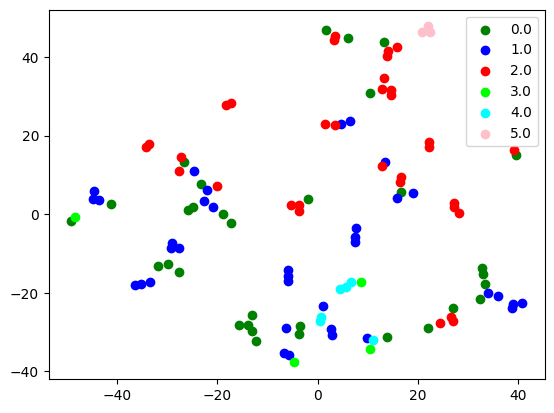

F1: 0.6923076923076923, Acc: 0.6923076923076923
Model saved!
-----Epoch 1-----
train loss : 0.9176234490800612
val loss : 0.30973462416575503
F1: 0.7692307692307693, Acc: 0.7692307692307693
Model saved!
-----Epoch 2-----
train loss : 0.8515930028245
val loss : 0.30541234750014085
F1: 0.6923076923076923, Acc: 0.6923076923076923
-----Epoch 3-----
train loss : 0.7489594539793412
val loss : 0.2923904565664438
F1: 0.8461538461538461, Acc: 0.8461538461538461
Model saved!
-----Epoch 4-----
train loss : 0.7411007350034052
val loss : 0.2853562373381395
F1: 0.6923076923076923, Acc: 0.6923076923076923
-----Epoch 5-----
train loss : 0.6745516781759734
val loss : 0.28330300404475284


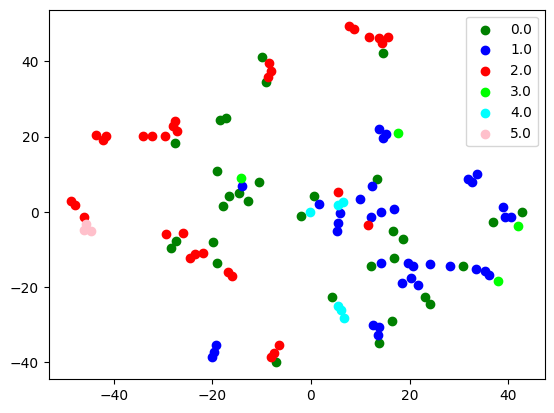

F1: 0.6923076923076923, Acc: 0.6923076923076923
-----Epoch 6-----
train loss : 0.6396734720409507
val loss : 0.2783812926365779
F1: 0.6923076923076923, Acc: 0.6923076923076923
-----Epoch 7-----
train loss : 0.6120532140283301
val loss : 0.2763940095901489
F1: 0.7692307692307693, Acc: 0.7692307692307693
-----Epoch 8-----
train loss : 0.6044456498457653
val loss : 0.2720919664089496
F1: 0.6923076923076923, Acc: 0.6923076923076923
-----Epoch 9-----
train loss : 0.6062218476049971
val loss : 0.2658599798495953
F1: 0.6923076923076923, Acc: 0.6923076923076923
-----Epoch 10-----
train loss : 0.587988425304394
val loss : 0.25656017431846034


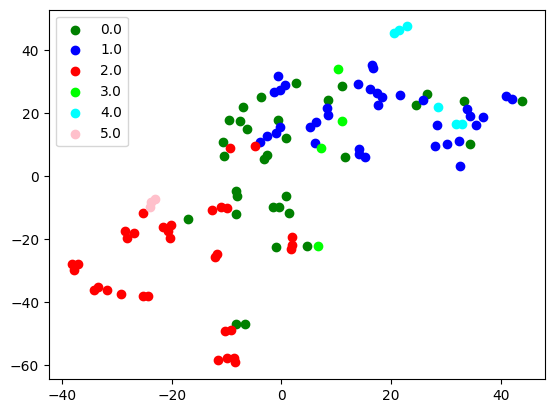

F1: 0.6923076923076923, Acc: 0.6923076923076923
-----Epoch 11-----
train loss : 0.5793069179105287
val loss : 0.24875454719250017
F1: 0.6923076923076923, Acc: 0.6923076923076923
-----Epoch 12-----
train loss : 0.5536986264852014
val loss : 0.23758077162962693
F1: 0.7692307692307693, Acc: 0.7692307692307693
-----Epoch 13-----
train loss : 0.5669509526526574
val loss : 0.2274928092956543
F1: 0.8461538461538461, Acc: 0.8461538461538461
Model saved!
-----Epoch 14-----
train loss : 0.5046246308501404
val loss : 0.21746592338268572
F1: 0.7692307692307693, Acc: 0.7692307692307693
-----Epoch 15-----
train loss : 0.5002148475977454
val loss : 0.20862012184583223


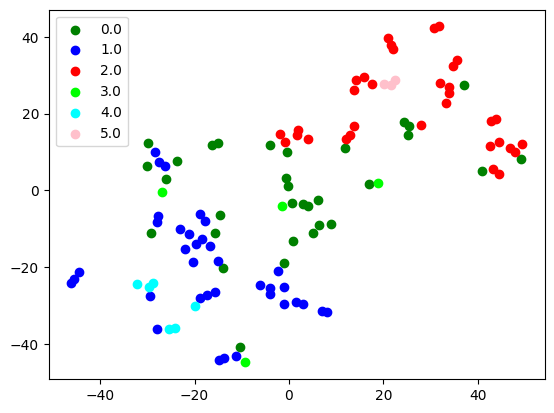

F1: 0.8461538461538461, Acc: 0.8461538461538461
Model saved!
-----Epoch 16-----
train loss : 0.5133987134045893
val loss : 0.20081443970020002
F1: 0.8461538461538461, Acc: 0.8461538461538461
Model saved!
-----Epoch 17-----
train loss : 0.5001070402046242
val loss : 0.19495253838025606
F1: 0.8461538461538461, Acc: 0.8461538461538461
Model saved!
-----Epoch 18-----
train loss : 0.46075525171685927
val loss : 0.19076941563532904
F1: 0.6923076923076923, Acc: 0.6923076923076923
-----Epoch 19-----
train loss : 0.48116290244725674
val loss : 0.18750395683141854
F1: 0.7692307692307693, Acc: 0.7692307692307693
-----Epoch 20-----
train loss : 0.4710480063268454
val loss : 0.1852851280799279


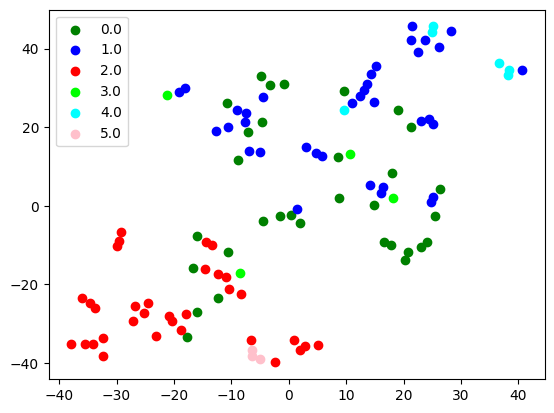

F1: 0.6923076923076923, Acc: 0.6923076923076923
-----Epoch 21-----
train loss : 0.4440127929838577
val loss : 0.18562271961799034
F1: 0.6923076923076923, Acc: 0.6923076923076923
-----Epoch 22-----
train loss : 0.4372832223330394
val loss : 0.18925013908973107
F1: 0.6923076923076923, Acc: 0.6923076923076923
-----Epoch 23-----
train loss : 0.45074906355083577
val loss : 0.19150460224885207
F1: 0.7692307692307693, Acc: 0.7692307692307693
-----Epoch 24-----
train loss : 0.4172321605210257
val loss : 0.1925501823425293
F1: 0.7692307692307693, Acc: 0.7692307692307693
-----Epoch 25-----
train loss : 0.4102793746065385
val loss : 0.1931338493640606


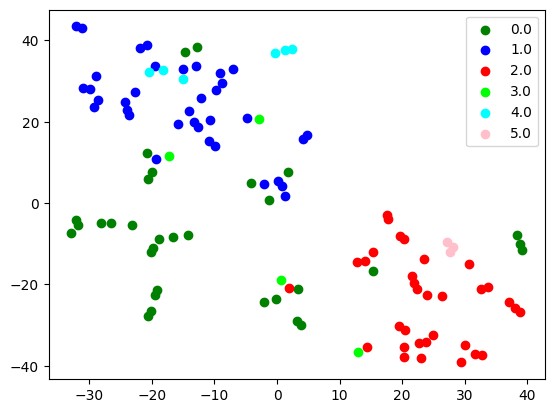

F1: 0.7692307692307693, Acc: 0.7692307692307693
-----Epoch 26-----
train loss : 0.3858322055623083
val loss : 0.19356049941136286
F1: 0.7692307692307693, Acc: 0.7692307692307693
-----Epoch 27-----
train loss : 0.393163526412284
val loss : 0.195555907029372
F1: 0.9230769230769231, Acc: 0.9230769230769231
Model saved!
-----Epoch 28-----
train loss : 0.41007230836566133
val loss : 0.1955982675919166
F1: 0.7692307692307693, Acc: 0.7692307692307693
-----Epoch 29-----
train loss : 0.37563046340895173
val loss : 0.19720770304019636
F1: 0.7692307692307693, Acc: 0.7692307692307693
-----Epoch 30-----
train loss : 0.3706967151991212
val loss : 0.19645412610127375


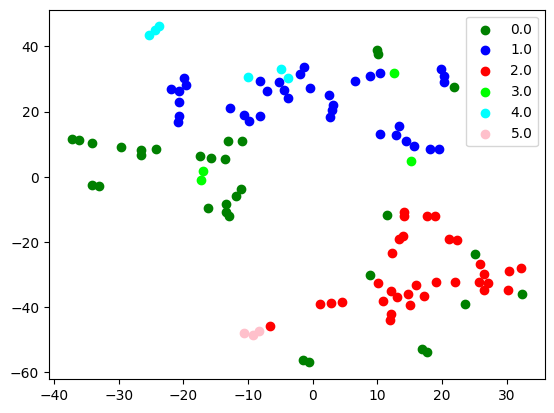

F1: 0.7692307692307693, Acc: 0.7692307692307693
-----Epoch 31-----
train loss : 0.325466244527609
val loss : 0.192648144868704
F1: 0.7692307692307693, Acc: 0.7692307692307693
-----Epoch 32-----
train loss : 0.3672829963783226
val loss : 0.18998638941691473
F1: 0.7692307692307693, Acc: 0.7692307692307693
-----Epoch 33-----
train loss : 0.33220701347483267
val loss : 0.18769360047120315
F1: 0.7692307692307693, Acc: 0.7692307692307693
-----Epoch 34-----
train loss : 0.3558550477027893
val loss : 0.18774861555833083
F1: 0.7692307692307693, Acc: 0.7692307692307693
-----Epoch 35-----
train loss : 0.32526498472336496
val loss : 0.19145065546035767


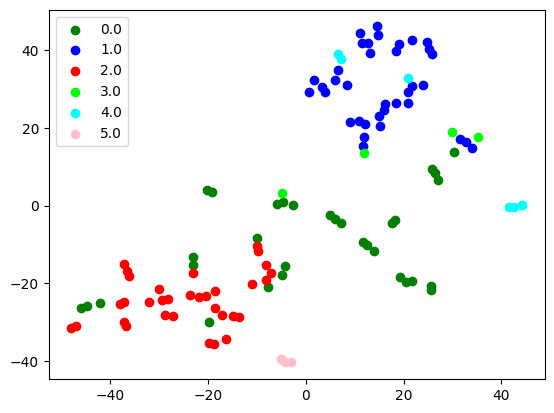

F1: 0.7692307692307693, Acc: 0.7692307692307693
-----Epoch 36-----
train loss : 0.3306534257855746
val loss : 0.19524721457408026
F1: 0.8461538461538461, Acc: 0.8461538461538461
-----Epoch 37-----
train loss : 0.31838231954244106
val loss : 0.19909342435690072
F1: 0.7692307692307693, Acc: 0.7692307692307693
-----Epoch 38-----
train loss : 0.3500274449291796
val loss : 0.20340364712935227
F1: 0.7692307692307693, Acc: 0.7692307692307693
-----Epoch 39-----
train loss : 0.3140082536357464
val loss : 0.20279590900127703
F1: 0.7692307692307693, Acc: 0.7692307692307693
-----Epoch 40-----
train loss : 0.3278301237243237
val loss : 0.19854818399135882


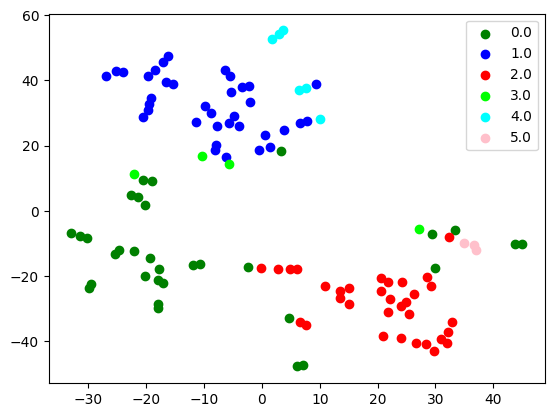

F1: 0.7692307692307693, Acc: 0.7692307692307693
-----Epoch 41-----
train loss : 0.28990239436083504
val loss : 0.19770602996532732
F1: 0.8461538461538461, Acc: 0.8461538461538461
-----Epoch 42-----
train loss : 0.31337801861290887
val loss : 0.20311048856148353
F1: 0.9230769230769231, Acc: 0.9230769230769231
Model saved!
-----Epoch 43-----
train loss : 0.30186365382506114
val loss : 0.2143348868076618
F1: 0.9230769230769231, Acc: 0.9230769230769231
Model saved!
-----Epoch 44-----
train loss : 0.2775629696869614
val loss : 0.22692934824870184
F1: 0.8461538461538461, Acc: 0.8461538461538461
-----Epoch 45-----
train loss : 0.29421346258408954
val loss : 0.23341676822075477


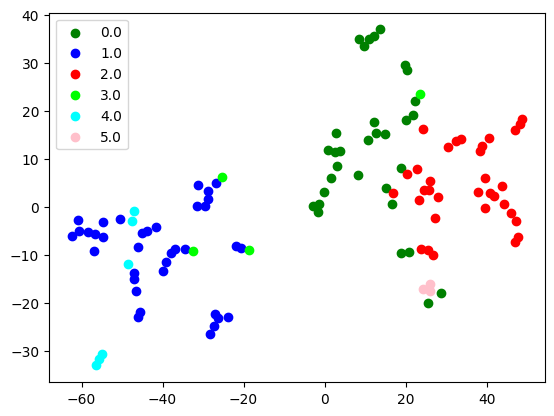

F1: 0.6923076923076923, Acc: 0.6923076923076923
-----Epoch 46-----
train loss : 0.3137592959522021
val loss : 0.24112600088119507
F1: 0.6923076923076923, Acc: 0.6923076923076923
-----Epoch 47-----
train loss : 0.2770423180986159
val loss : 0.24870974742449248
F1: 0.6923076923076923, Acc: 0.6923076923076923
-----Epoch 48-----
train loss : 0.2546659442457822
val loss : 0.25102166946117693
F1: 0.6923076923076923, Acc: 0.6923076923076923
-----Epoch 49-----
train loss : 0.2568092526185631
val loss : 0.25018632411956787
F1: 0.6923076923076923, Acc: 0.6923076923076923


KeyError: ignored

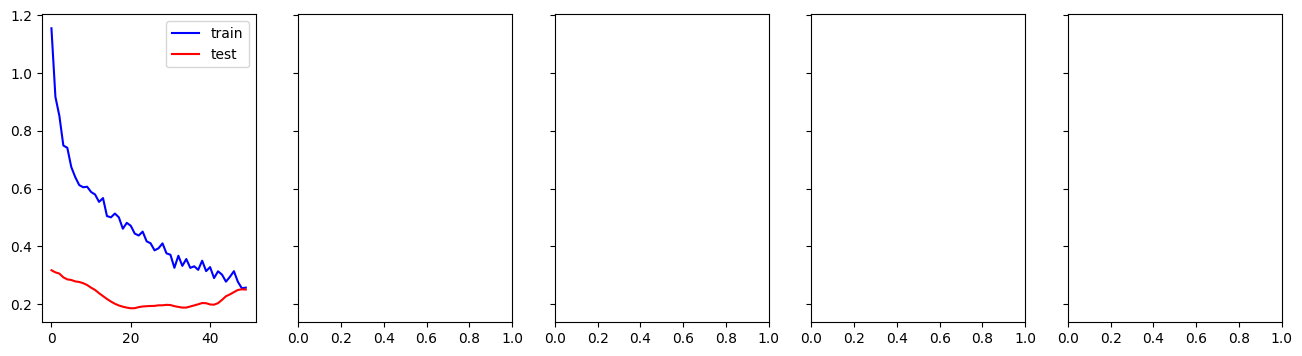

In [16]:
#Gradient Descent
mode = 'triplet' # 'adaptive ' #'triplet'  #adaptive
EPOCHS =50
LR = 0.001
STEP_SIZE = 15
num_features = 16
num_triplets = 1

torch.manual_seed(1)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
root = '/content/drive/MyDrive/OxML/MLx Cases/data/'
df_org = pd.read_csv('/content/drive/MyDrive/OxML/MLx Cases/data/labels.csv')
df = pd.read_csv('/content/drive/MyDrive/OxML/MLx Cases/data/extended_labels.csv')
skf = StratifiedKFold(n_splits=10)
scores = {}
loss_hist = {}
best_f1 = 0
for fold, (train_index, val_index) in enumerate(skf.split(df_org['id'], df_org['malignant'])):
    print(f'Fold {fold}: ')
    train_ids = df_org.loc[train_index, 'id']
    val_ids = df_org.loc[val_index, 'id']
    train_df = df[df['id'].isin(train_ids)]
    val_df = df[df['id'].isin(val_ids)]

    train_transforms = transforms.Compose([ transforms.ToTensor(),
                                            transforms.Normalize((0.7855, 0.6791, 0.8600),
                                                                 (0.2116, 0.2516, 0.1184)),
                                            transforms.RandomRotation(10)
                                            #transforms.RandomHorizontalFlip(),
                                            #transforms.RandomVerticalFlip()
                                            ])
    val_transforms = transforms.Compose([transforms.ToTensor(),
                                         transforms.Normalize((0.7855, 0.6791, 0.8600),
                                                              (0.2116, 0.2516, 0.1184))
                                         ])

    dataset = {'train': CustomDataset(root, train_df, transform=train_transforms, phase='train'),
               'val' : CustomDataset(root, val_df, transform=val_transforms, phase='val')}

    dataloader = {x: DataLoader(dataset[x], batch_size=1, shuffle=True) for x in ['train', 'val']}
    print('Train dataset size:',len(dataset['train']))
    print('Val dataset size:',len(dataset['val']))
    #model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
    model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
    #model = torch.nn.Sequential(*list(model.children())[:-1])
    in_features = model.fc.in_features
    model.fc = nn.Linear(in_features, num_features)
    model.to(device)
    for i, child in enumerate(model.children()):
        if i < 8:
            for param in child.parameters():
                param.requires_grad = False
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=LR, weight_decay=0.001)
    #
    #criterion = nn.CrossEntropyLoss(weight=torch.FloatTensor([0.21, 0.38, 0.41]).to(device)) #[0.42, 0.77, 0.81]
    if mode == 'triplet':
        criterion = nn.TripletMarginLoss(margin=0.2)
    elif mode == 'adaptive':
        criterion = AdaptiveMarginLoss()
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=STEP_SIZE)

    loss_hist[fold] = {'train':[], 'val':[]}
    scores[fold] = {'train':[], 'val':[]}

    for epoch in range(EPOCHS):
        features, labels = {}, {}
        print('-'*5+'Epoch '+str(epoch)+'-'*5)
        for phase in ['train', 'val']:
            #model.train() if phase == 'train' else model.eval()
            model.eval()
            running_loss = 0
            labels[phase] = torch.Tensor().to(device)
            features[phase] = torch.Tensor().to(device)
            for data in dataloader[phase]:
                input, label = data[0].to(device), data[1].to(device)
                if phase == 'train':
                    outputs = model(input)
                else:
                    with torch.no_grad():
                        outputs = model(input)

                labels[phase] = torch.cat((labels[phase], label))
                features[phase] = torch.cat((features[phase], outputs))
            #print(features[phase])
            distances = torch.cdist(features[phase], features[phase])
            indices = torch.argsort(distances)
            #print(indices)
            for i,lbl in enumerate(labels[phase]):

                positives = indices[i][labels[phase][indices][i] == lbl][1:]
                negatives = indices[i][labels[phase][indices][i] != lbl]
                if len(positives)==0 or len(negatives)==0:
                    continue
                anchor = features[phase][i].expand(num_triplets, num_features)
                positive = features[phase][positives[-num_triplets:]]
                negative = features[phase][negatives[:num_triplets]]
                if mode == 'triplet':
                    loss = criterion(anchor, positive, negative)
                elif mode == 'adaptive':
                    if (lbl == 0) or (labels[phase][negatives[0]] == 0):
                        margin = 0.4
                    else:
                        margin = 0.2
                    loss = criterion(anchor, positive, negative, margin)
                running_loss += loss.item()
                if phase == 'train':
                    loss.backward(retain_graph=True)

            if phase == 'train':
                optimizer.step()
                optimizer.zero_grad()

            epoch_loss = running_loss/len(dataset[phase])
            loss_hist[fold][phase].append(epoch_loss)
            print(f'{phase} loss : {epoch_loss}')

        total_features = torch.cat((features['train'], features['val']))
        total_labels = torch.cat((labels['train'], labels['val']+3))
        if num_features != 2:
            reduced_features = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(total_features.detach().cpu())
        else:
            reduced_features = total_features.detach().cpu()
        total_labels = total_labels.detach().cpu().numpy()

        cdict = {0: 'green',1: 'blue', 2: 'red', 3: 'lime', 4: 'aqua', 5: 'pink'}
        if epoch%5 == 0:
            fig, ax = plt.subplots()
            for g in np.unique(total_labels):
                ix = np.where(total_labels == g)
                ax.scatter(reduced_features[ix,0], reduced_features[ix,1], c = cdict[g], label = g)
            ax.legend()
            plt.show()

        knn = KNeighborsClassifier(n_neighbors=5)

        knn.fit(features['train'].squeeze().detach().cpu().numpy(), labels['train'].detach().cpu().numpy())
        preds = knn.predict(features['val'].squeeze().detach().cpu().numpy())

        f1 = f1_score(labels['val'].cpu(), preds, average='micro')
        acc = accuracy_score(labels['val'].cpu(), preds)
        scores[fold][phase].append(f1)
        print(f'F1: {f1}, Acc: {acc}')
        if  f1 >= best_f1:
            best_f1 = f1
            best_model_wts = copy.deepcopy(model.state_dict())
            print('Model saved!')

    break
#model.load_state_dict(best_model_wts)
#print(f'Average F1 score: {sum(scores)/len(scores)}')

fig, axs = plt.subplots(1,5, figsize=(16,4), sharey=True)
for i in range(1):
    axs[i].plot(range(EPOCHS), loss_hist[i]['train'], color='blue', label='train')
    axs[i].plot(range(EPOCHS), loss_hist[i]['val'], color='red', label='test')
    #axs[i].plot(range(EPOCHS), scores[i], color='green', label='F1')
    if i != 0:
        axs[i].set_yticklabels([])
    else:
        axs[i].legend()
plt.show()
fig, axs = plt.subplots(1,5, figsize=(16,4), sharey=True)
for i in range(1):
    axs[i].plot(range(EPOCHS), scores[i]['train'], color='blue', label='train')
    axs[i].plot(range(EPOCHS), scores[i]['val'], color='red', label='test')
    #axs[i].plot(range(EPOCHS), scores[i], color='green', label='F1')
    if i != 0:
        axs[i].set_yticklabels([])
    else:
        axs[i].legend()
plt.show()

(238, 2)


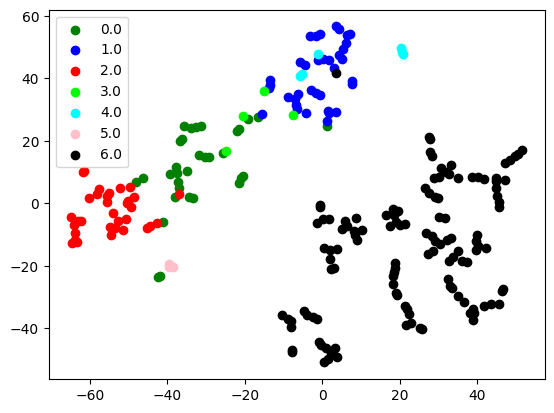

0.8461538461538461


In [17]:
out_dict = {'id' : [], 'malignant': []}
df_test = pd.read_csv('/content/drive/MyDrive/OxML/MLx Cases/data/test.csv')
transforms_list = transforms.Compose([transforms.ToTensor()])
dataset['test'] = CustomDataset(root, df_test, transform=transforms_list, phase='test')
dataloader['test'] = DataLoader(dataset['test'], batch_size=1, shuffle=False)
model.load_state_dict(best_model_wts)
features, labels = {}, {}
for phase in ['train', 'val', 'test']:
    #model.train() if phase == 'train' else model.eval()
    model.eval()
    labels[phase] = torch.Tensor().to(device)
    features[phase] = torch.Tensor().to(device)
    for data in dataloader[phase]:
        input, label, pid = data[0].to(device), data[1].to(device), data[2]
        if phase == 'test':
            out_dict['id'].append(pid.item())

        if phase == 'train':
            outputs = model(input)
        else:
            with torch.no_grad():
                outputs = model(input)

        labels[phase] = torch.cat((labels[phase], label))
        features[phase] = torch.cat((features[phase], outputs))

total_features_full = torch.cat((features['train'], features['val'],features['test']))
total_features = torch.cat((features['train'], features['val']))
total_labels_org = torch.cat((labels['train'], labels['val']))
total_labels_full = torch.cat((labels['train'], labels['val']+3, torch.Tensor([6]*len(labels['test'])).to(device)))
if num_features != 2:
    reduced_features = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(total_features_full.detach().cpu())
else:
    reduced_features = total_features_full.detach().cpu()
#reduced_features = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(total_features.detach().cpu())
print(reduced_features.shape)
total_labels = total_labels_full.detach().cpu().numpy()

cdict = {0: 'green',1: 'blue', 2: 'red', 3: 'lime', 4: 'aqua', 5: 'pink', 6: 'black'}
fig, ax = plt.subplots()
for g in np.unique(total_labels):
    ix = np.where(total_labels == g)
    ax.scatter(reduced_features[ix,0], reduced_features[ix,1], c = cdict[g], label = g)
ax.legend()
plt.show()

neighbors = 3

knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(features['train'].detach().cpu(), labels['train'].detach().cpu())
val_pred = knn.predict(features['val'].detach().cpu())
f1 = f1_score(labels['val'].cpu(), val_pred, average='micro')
print(f1)

knn.fit(total_features.detach().cpu(), total_labels_org.detach().cpu())
out_dict['malignant'] = knn.predict(features['test'].detach().cpu()).astype(int)-1
out_df = pd.DataFrame(out_dict)
out_df.to_csv(f'submission_{neighbors}_{f1:.3f}.csv', index=False)
#plt.scatter(reduced_features[:,0], reduced_features[:,1], c=total_labels.detach().cpu())